In [19]:
pip install marsilea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.1 MB/s eta 0:00:00


In [2]:
pip install lazyslide

In [3]:
pip install tiffslide

# Feature extraction and spatial analysis

In [4]:
from huggingface_hub import hf_hub_download

slide = hf_hub_download(
    "rendeirolab/lazyslide-data",
    "GTEX-11DXX-1626.svs",
    repo_type="dataset",
    cache_dir="."
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
from wsidata import open_wsi
import lazyslide as zs

import matplotlib.pyplot as plt

/usr/lib/python3.12/importlib/__init__.py:90: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)


WSI: datasets--rendeirolab--lazyslide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-11DXX-1626.svs
Reader: openslide
Dimensions: 38717×51791 (h×w), 3 Pyramids
Pixel physical size: 0.4942 MPP
SpatialData object
└── Images
      └── 'wsi_thumbnail': DataArray[cyx] (3, 1118, 1495)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images)
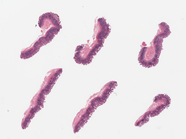

In [6]:
wsi = open_wsi(slide)
wsi

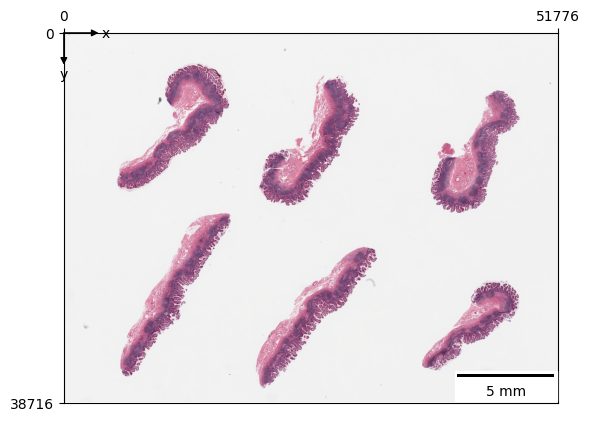

In [7]:
zs.pl.tissue(wsi)

In [8]:
zs.pp.find_tissues(wsi)
zs.pp.tile_tissues(wsi, 128)

In [9]:
zs.tl.feature_extraction(wsi, "plip", amp=True)

/usr/local/lib/python3.12/dist-packages/lazyslide/models/multimodal/plip.py:24: UserWarning: As from v0.8.2, Normalization will not be applied to image embedding of PLIP model anymore.A `normalize=True` argument is added to the `text_image_similarity` method.If you only use the image embedding for text image similarity, you can safely ignore this warning.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Output()

In [10]:
zs.tl.feature_aggregation(wsi, feature_key="plip")
adata = wsi.fetch.features_anndata("plip")

# Pre-computed results

In [11]:
wsi = zs.datasets.gtex_small_intestine()

/usr/local/lib/python3.12/dist-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


WSI: /root/.cache/huggingface/hub/datasets--RendeiroLab--LazySlide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-11DXX-1626.svs
Reader: openslide
Dimensions: 38717×51791 (h×w), 3 Pyramids
Pixel physical size: 0.4942 MPP
SpatialData object, with associated Zarr store: /root/.cache/huggingface/hub/datasets--RendeiroLab--LazySlide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-11DXX-1626.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1118, 1495)
├── Shapes
│     ├── 'tiles': GeoDataFrame shape: (19038, 3) (2D shapes)
│     └── 'tissues': GeoDataFrame shape: (6, 2) (2D shapes)
└── Tables
      ├── 'plip_tiles': AnnData (19038, 512)
      └── 'plip_tiles_text_similarity': AnnData (19038, 4)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), tiles (Shapes), tissues (Shapes)
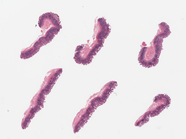

In [12]:
wsi

# Examination of feature space

In [13]:
!pip install scanpy
!pip install igraph


  Using cached igraph-1.0.0-cp39-abi3-manylinux_2_28_x86_64.whl.metadata (4.4 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
Using cached igraph-1.0.0-cp39-abi3-manylinux_2_28_x86_64.whl (5.7 MB)
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)


# Examination of feature space

In [14]:
import scanpy as sc

adata = wsi["plip_tiles"]
sc.pp.scale(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, flavor="igraph", resolution=0.2)

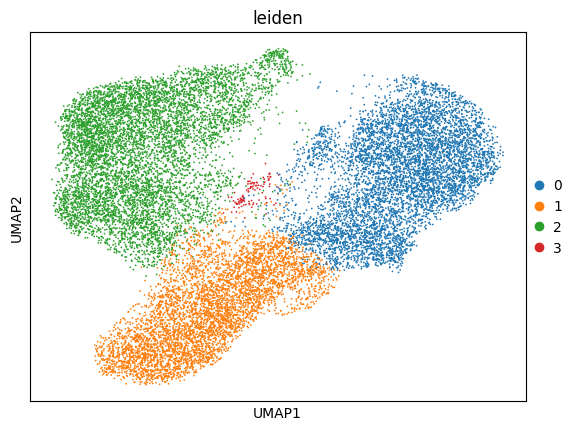

In [15]:
sc.pl.umap(adata, color="leiden")

In [16]:
sc.tl.rank_genes_groups(adata, groupby="leiden")

features = set()
for i in adata.obs["leiden"].unique():
    names = sc.get.rank_genes_groups_df(adata, i).names
    features.update(list(names[0:10]) + list(names[-10:]))
features = list(features)

/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


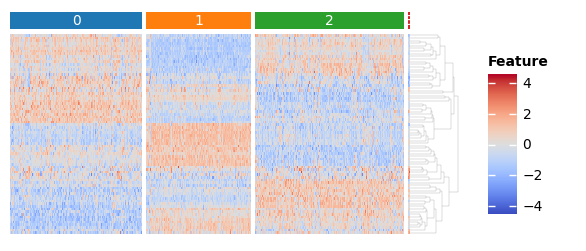

In [20]:
import marsilea as ma
import marsilea.plotter as mp
from scipy.stats import zscore

key = "leiden"
h = ma.Heatmap(zscore(adata[:, features].X.T), height=2, width=4, label="Feature")
order = sorted(adata.obs[key].unique())
h.group_cols(adata.obs[key], order=order)
h.add_top(mp.Chunk(order, fill_colors=adata.uns[f"{key}_colors"], padding=2), pad=0.05)
h.add_dendrogram("right", method="average", linewidth=0.1)
h.add_legends()
h.render()

# Identification of spatial domains

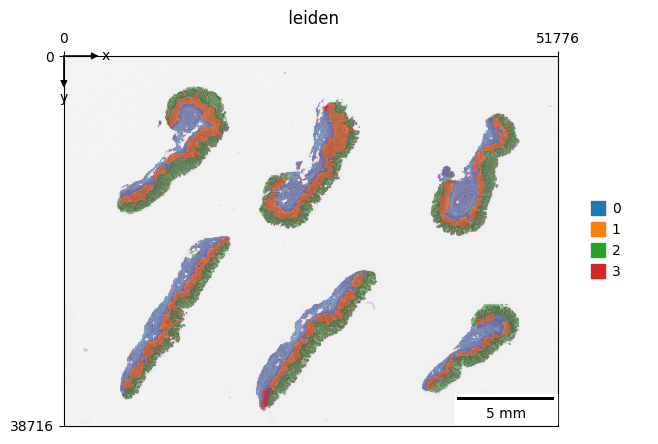

In [21]:
zs.pl.tiles(
    wsi,
    feature_key="plip",
    color="leiden",
    alpha=0.5,
    palette=adata.uns[f"{key}_colors"],
    show_contours=False,
)

In [22]:
zs.tl.spatial_domain(wsi, feature_key="plip", resolution=0.2)


In [23]:
wsi.write()

# Integration of spatial information with UTAG

In [24]:
zs.pp.tile_graph(wsi)
zs.tl.spatial_features(wsi, "plip")

In [25]:
zs.tl.spatial_domain(wsi, layer="spatial_features", feature_key="plip", resolution=0.2)

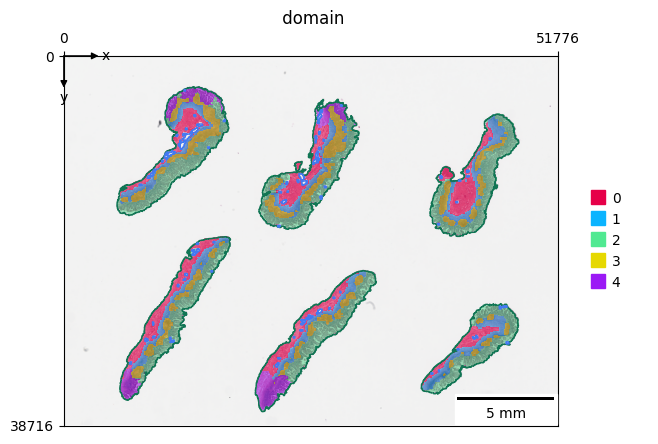

In [26]:
zs.pl.tiles(wsi, color="domain", alpha=0.5)

In [27]:
terms = ["mucosa", "submucosa", "musclaris", "lymphocyte"]

In [28]:
embeddings = zs.tl.text_embedding(terms, model="plip")
zs.tl.text_image_similarity(wsi, embeddings, model="plip", softmax=True)

/usr/local/lib/python3.12/dist-packages/lazyslide/tools/_text_annotate.py:66: UserWarning: As from v0.8.2, Normalization will not be applied to image embedding of PLIP model anymore.A `normalize=True` argument is added to the `text_image_similarity` method.If you only use the image embedding for text image similarity, you can safely ignore this warning.
  model = MODEL_REGISTRY[model]()
/tmp/ipython-input-212835638.py:2: UserWarning: As of v0.8.2, the image embedding from image text model is not normalized after feature extraction by default. The normalization is applied here (text_image_similarity),if your features are extracted in previous versions, consider setting normalize=False.
  zs.tl.text_image_similarity(wsi, embeddings, model="plip", softmax=True)
/usr/local/lib/python3.12/dist-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `plip_tiles_text_similarity` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


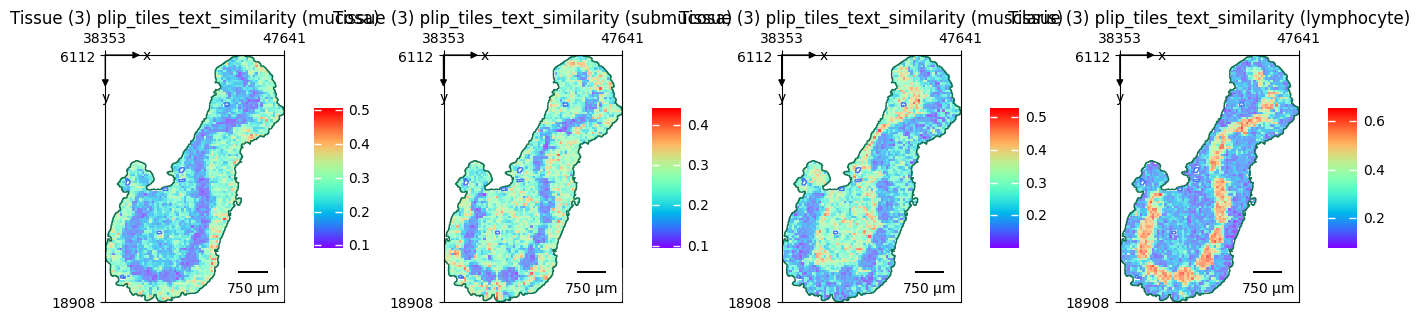

In [29]:
zs.pl.tiles(
    wsi,
    feature_key="plip_tiles_text_similarity",
    color=terms,
    cmap="rainbow",
    show_image=False,
    tissue_id=3,
    alpha=0.7,
)